<img src="https://bit.ly/2VnXWr2" width="100" align="left">

# Project | Statistical Analysis: Does culture affects happiness perception?

## Introduction

In order to practice statistical analysis using the iterative data analysis process, I've chosen two datasets related to my backround in psychology. One is [Hofstede's six-dimensions model](https://data.world/adamhelsinger/geerthofstedeculturaldimension) has information on the results of several countries for various years and, similarly [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness); we will focus on 2015 data.

### Objectives

We wanted to see if there is relevant correlationship between being an **Individualistic or a Collectivistic** country and how **Happy** this country citizens are. 

### Imports

In [44]:
import plotly.graph_objs as go
from ipywidgets import interact
from plotly.subplots import make_subplots
import cufflinks as cf
import plotly.offline as py
import numpy as np
import pandas as pd
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from pandas.plotting import scatter_matrix
%matplotlib inline
mpl.rcParams["backend"] = "TkAgg"
from scipy.stats import pearsonr
from statsmodels.multivariate.pca import PCA
import statsmodels.api as sm
cf.go_offline()

## 1. EDA

### Hofstede's six-dimensions model (2015)

#### Context

**Geert Hofstede's cultural dimensions theory** proposes a method of analyzing cultures based on a handful of continuums.

`Power distance index (PDI):` The power distance index is defined as “the extent to which the less powerful members of organizations and institutions (like the family) accept and expect that power is distributed unequally.”

`Individualism vs. collectivism (IDV):` This index explores the “degree to which people in a society are integrated into groups.”

`Uncertainty avoidance index (UAI):` The uncertainty avoidance index is defined as “a society's tolerance for ambiguity,” in which people embrace or avert an event of something unexpected, unknown, or away from the status quo.

`Masculinity vs. femininity (MAS):` In this dimension, masculinity is defined as “a preference in society for achievement, heroism, assertiveness and material rewards for success.”

`Long-term orientation vs. short-term orientation (LTO):` This dimension associates the connection of the past with the current and future actions/challenges.

`Indulgence vs. restraint (IND):` This dimension is essentially a measure of happiness; whether or not simple joys are fulfilled.

More contextual information about this model can be found in here: https://scholarworks.gvsu.edu/cgi/viewcontent.cgi?referer=https://en.wikipedia.org/&httpsredir=1&article=1014&context=orpc

#### Read dataset and check head

In [2]:
cultural_dimensionality = pd.read_csv("data/culturaldimensions/6_dimensions_for_website.csv")
cultural_dimensionality.head()

,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
0,AFE,Africa East,64.0,27.0,41.0,52.0,32.000000,40.000000
1,AFW,Africa West,77.0,20.0,46.0,54.0,9.000000,78.000000
2,ALB,Albania,NaN,NaN,NaN,NaN,61.460957,14.508929
3,ALG,Algeria,NaN,NaN,NaN,NaN,25.944584,32.366071
4,AND,Andorra,NaN,NaN,NaN,NaN,NaN,65.000000


##### Minor manipulation

In [3]:
#As it can be confusing we will rename columns to its original test short-forms and keep the same order
cultural_dimensionality.columns=["ctr", "country", "pdi", "idv", "mas", "uai", "lto", "ind"]
cultural_dimensionality = cultural_dimensionality[["ctr", "country", "pdi", "idv", "uai", "mas", "lto", "ind"]]
cultural_dimensionality.head()

,ctr,country,pdi,idv,uai,mas,lto,ind
0,AFE,Africa East,64.0,27.0,52.0,41.0,32.000000,40.000000
1,AFW,Africa West,77.0,20.0,54.0,46.0,9.000000,78.000000
2,ALB,Albania,NaN,NaN,NaN,NaN,61.460957,14.508929
3,ALG,Algeria,NaN,NaN,NaN,NaN,25.944584,32.366071
4,AND,Andorra,NaN,NaN,NaN,NaN,NaN,65.000000


#### Check tail

In [4]:
#As they're ordered I'll print tail too
cultural_dimensionality.tail()

,ctr,country,pdi,idv,uai,mas,lto,ind
106,URU,Uruguay,61.0,36.0,100.0,38.0,26.196474,53.348214
107,VEN,Venezuela,81.0,12.0,76.0,73.0,15.617128,100.000000
108,VIE,Vietnam,70.0,20.0,30.0,40.0,57.178841,35.491071
109,ZAM,Zambia,NaN,NaN,NaN,NaN,30.226700,42.187500
110,ZIM,Zimbabwe,NaN,NaN,NaN,NaN,15.365239,27.678571


#### Check shape

In [5]:
cultural_dimensionality.shape

(111, 8)

#### Check dtypes and columns

In [6]:
cultural_dimensionality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ctr      111 non-null    object 
 1   country  111 non-null    object 
 2   pdi      78 non-null     float64
 3   idv      78 non-null     float64
 4   uai      78 non-null     float64
 5   mas      78 non-null     float64
 6   lto      96 non-null     float64
 7   ind      97 non-null     float64
dtypes: float64(6), object(2)
memory usage: 7.1+ KB


#### Check nulls

In [7]:
print("Are there any missing values? :",cultural_dimensionality.isnull().any().any())
print(cultural_dimensionality.isnull().sum())

Are there any missing values? : True
ctr         0
country     0
pdi        33
idv        33
uai        33
mas        33
lto        15
ind        14
dtype: int64


#### Check duplicates

In [8]:
print("Are there duplicated values? :",cultural_dimensionality.duplicated().any().any())
print(cultural_dimensionality.duplicated().sum())

Are there duplicated values? : False
0


#### See some descriptive statistics

In [9]:
cultural_dimensionality.describe()

,pdi,idv,uai,mas,lto,ind
count,78.000000,78.000000,78.000000,78.000000,96.000000,97.000000
mean,59.333333,45.166667,67.641026,49.269231,45.479272,45.425534
std,21.223405,23.971529,22.992926,19.007636,24.232016,22.174204
min,11.000000,6.000000,8.000000,5.000000,0.000000,0.000000
25%,42.500000,23.500000,51.250000,40.000000,25.566751,29.241071
50%,62.000000,43.500000,69.500000,48.500000,44.584383,43.080357
75%,72.500000,67.750000,86.000000,61.750000,63.602015,63.000000
max,104.000000,91.000000,112.000000,110.000000,100.000000,100.000000


### World Happiness Report 2015

#### Context

**The World Happiness Report 2015** is a landmark survey of the state of global happiness which ranks 158 countries by their happiness levels based on six factors.


`Country:` Name of the country.

`Region:` Region the country belongs to.

`Happiness Rank:` Rank of the country based on the Happiness Score.

`Happiness Score:` A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

`Economy:` real GDP per capita

`Family:` social support

`Health:` healthy life expectancy

`Freedom:` freedom to make life choices

`Trust:` perceptions of corruption

`Generosity:` perceptions of generosity

`Dystopia:` each country is compared against a hypothetical nation that represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark

#### Read dataset and check head

In [10]:
whr2015 = pd.read_csv("data/happiness/2015.csv")
whr2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Check tail

In [11]:
#As they're ordered I'll print tail too
whr2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


#### Check shape

In [12]:
whr2015.shape

(158, 12)

#### Check dtypes and columns

In [13]:
whr2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Check nulls

In [14]:
print("Are there any missing values? :",whr2015.isnull().any().any())
print(whr2015.isnull().sum())

Are there any missing values? : False
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


#### Check duplicates

In [15]:
print("Are there duplicated values? :",whr2015.duplicated().any().any())
print(whr2015.duplicated().sum())

Are there duplicated values? : False
0


#### See some descriptive statistics

In [16]:
whr2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## 2. Describe relationships between variables

There's if sometimes issues for the 4 plots belaw, if that so try to switch off any or both of those imports below, iterate the plot again. If it doesn't work, switch them on again.

%matplotlib inline

mpl.rcParams["backend"] = "TkAgg"

### Hofstede's six-dimensions model (2015)

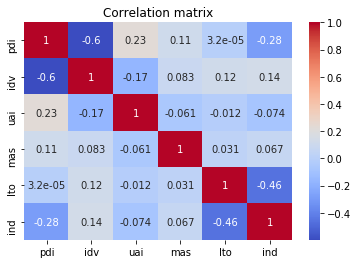

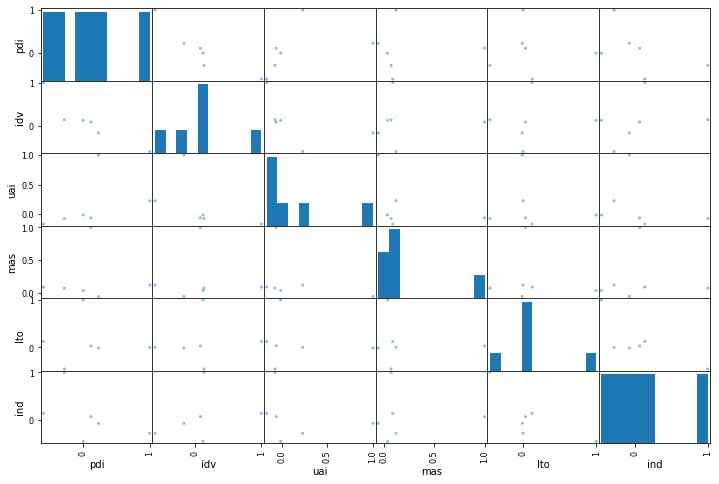

In [35]:
sns.heatmap(cultural_dimensionality.corr(),cmap='coolwarm',annot=True)
plt.title("Correlation matrix")


sm = scatter_matrix(cultural_dimensionality.corr(),figsize=(12,8))
plt.show()

plt.show()

#### Most correlations seem to be negligible but there's still some significant ones:
`Power distance` highly negatively correlates with `Individualism vs Collectivism`, and has low but significant correlations with `Uncertainty Avoidance`, positively, and negativley with  `Indulgence vs Restraint`. The latter also correlates moderately negatively with `Long Term versus Short Term Orientation`.

So the **more hierarchy** is accepted in a country, the **more colectivistic** the culture seems being also quite probable citizens' tendency to **avoid risk** and **surpress emotions and pleasure**.
In those countries where **pleasure seek is indulged**, usually there's also a common tendencty to think in the **short-term future**.

### World Happiness Report 2015

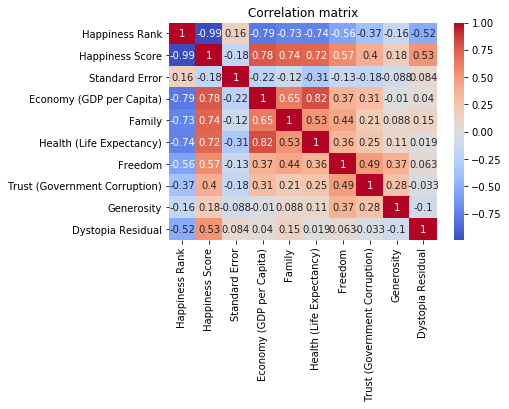

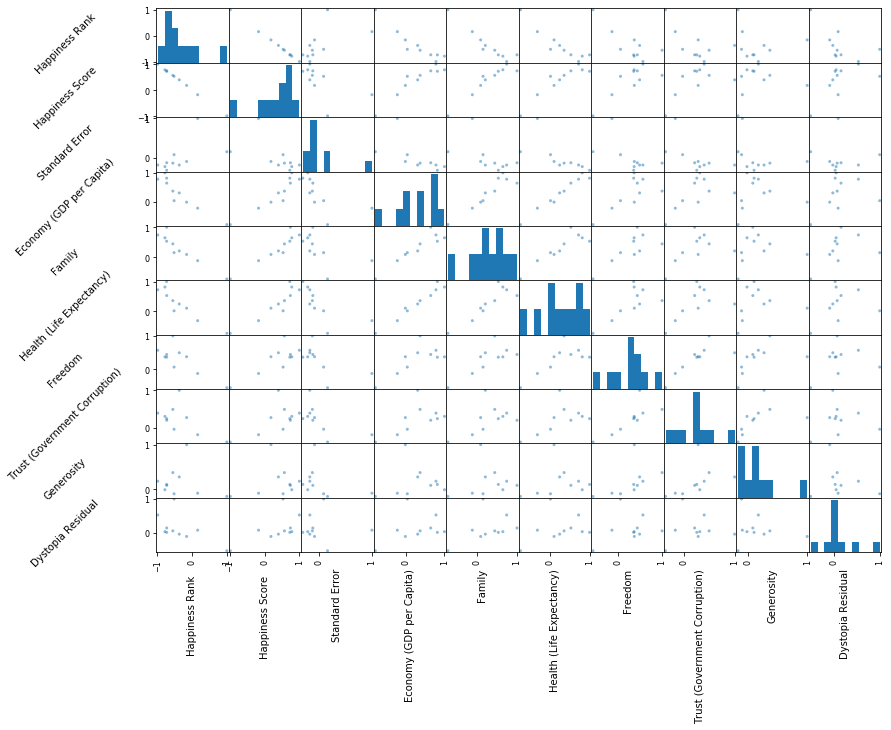

In [36]:
sns.heatmap(whr2015.corr(),cmap='coolwarm',annot=True)
plt.title("Correlation matrix")

sm = scatter_matrix(whr2015.corr(),figsize=(13,10))

#Change label rotation
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.2,0.3) for s in sm.reshape(-1)]


plt.show()

#### As the 6 indexes the test uses were chosen from factorizing Happiness Score, we will just focus on correletions between them.

They all positively correlate except `Generosity` with a negligible negative correlation with `Economy`.

Moreover, the top 3 correlations, being correlations over 0.5, are the top 3 Hapinnes Score factors: `Economy`, `Family` and `Health`.

## 3. Features should be investigated in depth combining datasets

Initially we wanted to see if there is relevant correlationship between being an individualistic or a colloectivistic country and how happy this country citizens are. Based on that, we state:

`H0: Individualistic societies are happier (>) than colectivistic ones.`

`H1: Individualistic societies aren't happier (<=) than colectivistic ones.`

*But we still check relationships with other culture dimensions.

#### Merge of datasets

In [19]:
cultural_happiness = pd.merge(cultural_dimensionality,whr2015,how="left",left_on=["country"],right_on=["Country"])
cultural_happiness.head()

,ctr,country,pdi,idv,uai,mas,lto,ind,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,AFE,Africa East,64.0,27.0,52.0,41.0,32.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFW,Africa West,77.0,20.0,54.0,46.0,9.000000,78.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Albania,NaN,NaN,NaN,NaN,61.460957,14.508929,Albania,Central and Eastern Europe,95.0,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
3,ALG,Algeria,NaN,NaN,NaN,NaN,25.944584,32.366071,Algeria,Middle East and Northern Africa,68.0,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
4,AND,Andorra,NaN,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Data cleaning & manipulation

### Feature reduction.

In [20]:
#At the moment we will only work with happiness Score and the different cultural dimensions so we will not keep other columns.

cultural_happiness_clean = cultural_happiness[["country","Region","Happiness Score","pdi","idv","uai","mas","lto","ind"]]
cultural_happiness_clean.set_index("country").head()

,Region,Happiness Score,pdi,idv,uai,mas,lto,ind
country,,,,,,,,
Africa East,NaN,NaN,64.0,27.0,52.0,41.0,32.000000,40.000000
Africa West,NaN,NaN,77.0,20.0,54.0,46.0,9.000000,78.000000
Albania,Central and Eastern Europe,4.959,NaN,NaN,NaN,NaN,61.460957,14.508929
Algeria,Middle East and Northern Africa,5.605,NaN,NaN,NaN,NaN,25.944584,32.366071
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.000000


### Remove columns with high proportion of missing values.

In [21]:
cultural_happiness_clean.shape

(111, 9)

In [22]:
print("Are there any missing values? :",cultural_happiness_clean.isnull().any().any())
print(cultural_happiness_clean.isnull().sum()/111*100)

Are there any missing values? : True
country             0.000000
Region             18.918919
Happiness Score    18.918919
pdi                29.729730
idv                29.729730
uai                29.729730
mas                29.729730
lto                13.513514
ind                12.612613
dtype: float64


As there is no column with as much nulls as to delete it completely.

### Remove records with missing values.

In [23]:
cultural_happiness_clean = cultural_happiness_clean.dropna(subset=["Happiness Score","pdi","idv","uai",
                                                                 "mas","lto","ind"]).set_index("country")
cultural_happiness_clean.head()

,Region,Happiness Score,pdi,idv,uai,mas,lto,ind
country,,,,,,,,
Argentina,Latin America and Caribbean,6.574,49.0,46.0,86.0,56.0,20.403023,61.830357
Australia,Australia and New Zealand,7.284,38.0,90.0,51.0,61.0,21.158690,71.428571
Austria,Western Europe,7.200,11.0,55.0,70.0,79.0,60.453401,62.723214
Bangladesh,Southern Asia,4.694,80.0,20.0,60.0,55.0,47.103275,19.642857
Belgium,Western Europe,6.937,65.0,75.0,94.0,54.0,81.863980,56.696429


### 5. Adjust skewed data distribution.

#### Normality testing

In [24]:
numeric_columns=["Happiness Score","pdi","idv","uai", "mas","lto","ind"]
[stats.normaltest(cultural_happiness_clean[string]) for string in numeric_columns]

[NormaltestResult(statistic=11.896387149074009, pvalue=0.0026105520292888625),
 NormaltestResult(statistic=0.613459191672954, pvalue=0.7358495507898628),
 NormaltestResult(statistic=23.71380093830166, pvalue=7.089466485304314e-06),
 NormaltestResult(statistic=2.6174050252026753, pvalue=0.27017037172347563),
 NormaltestResult(statistic=0.41533230001620536, pvalue=0.8124782372922011),
 NormaltestResult(statistic=5.399225048119113, pvalue=0.06723155830469059),
 NormaltestResult(statistic=0.9182402340531738, pvalue=0.6318393456777094)]

#### Standardize measures and check correlations

In [25]:
def standardize(x):
    # This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    # Sample input: np.array([[1,2,3],[4,5,6]])
    # Sample output: np.array([[-1,-1,-1],[1,1,1]])

    # Your code here:
    meanx0 = np.mean(x, axis=0)
    stdx0 = np.std(x, axis=0)
    return (x - meanx0) / stdx0

In [26]:
cultural_happiness_standardized = standardize(cultural_happiness_clean[["Happiness Score","pdi","idv","uai", "mas","lto","ind"]])
cultural_happiness_standardized.head()

,Happiness Score,pdi,idv,uai,mas,lto,ind
country,,,,,,,
Argentina,0.511754,-0.475945,0.072058,0.789923,0.443479,-1.274241,0.628854
Australia,1.285522,-1.023501,2.015295,-0.722453,0.706248,-1.239889,1.057551
Austria,1.193977,-2.367500,0.469538,0.098551,1.652214,0.546419,0.668732
Bangladesh,-1.537097,1.067165,-1.076219,-0.333557,0.390926,-0.060468,-1.255419
Belgium,0.907356,0.320499,1.352828,1.135609,0.338372,1.519728,0.399550


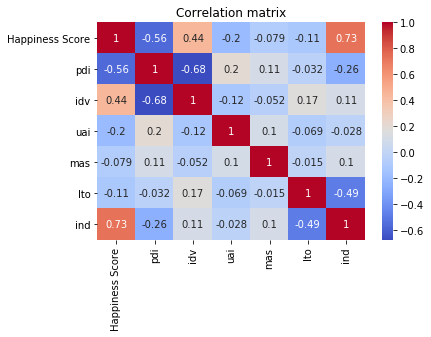

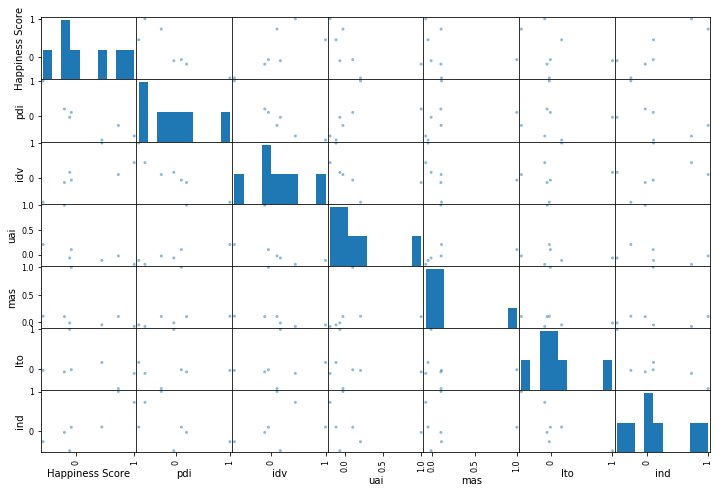

In [33]:
sns.heatmap(cultural_happiness_standardized.corr(),cmap='coolwarm',annot=True)
plt.title("Correlation matrix")

sm = scatter_matrix(cultural_happiness_standardized.corr(),figsize=(12,8))
plt.show()

#### Most correlations seem to be negligible but there's still some significant ones:
`Happiness Score` highly positively correlates with `Indulgence vs Restraint`(0.73), and moderately correlates with `Power distance` and `Individualism vs Collectivism`, respectively in a negative (-0.56) and in a positive(0.44) way.

So that **higher levels of happiness** are registered in coutries where **pleasure seek is indulged** and can be described as **egalitarian** and **individualistic**.

## 5. Hypothesis testing

As the hypothesis were sided and we have standardized data a one sided T-Test with a 95% confidence interval will be performed. 

H0: Individualistic societies are happier (>) than colectivistic ones.

H1: Individualistic societies aren't happier (<=) than colectivistic ones.

In [37]:
stat, p = pearsonr(cultural_happiness_standardized["Happiness Score"],cultural_happiness_standardized["idv"])
print("stat=%.3f, p=%.3f" % (stat, p))
print("Ho was rejected.") if p > 0.05 and stat >0 else print("Ho has been accepted")

stat=0.445, p=0.001
Ho has been accepted


## 6. Bonus: Regression analysis and PCA

#### Regression model

In [45]:
cultural_happiness_standardized.columns

Index(['Happiness Score', 'pdi', 'idv', 'uai', 'mas', 'lto', 'ind'], dtype='object')

In [46]:
X = cultural_happiness_standardized[["pdi", "idv", "uai", "mas", "lto", "ind"]]
Y = cultural_happiness_standardized["Happiness Score"]

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              26.77
Date:                Sat, 28 Mar 2020   Prob (F-statistic):                    3.74e-14
Time:                        20:39:06   Log-Likelihood:                         -40.324
No. Observations:                  57   AIC:                                      92.65
Df Residuals:                      51   BIC:                                      104.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pdi           -0.2109      0.099     -2.132      0.038      -0.410      -0.012
idv            0.1639      0.096      1.716      0.092      -0.028       0.356
uai           -0.0863      0.071     -1.222      0.227      -0.228       0.056
mas           -0.1157      0.070     -1.648      0.105      -0.257       0.025
lto            0.2302      0.082      2.811      0.007       0.066       0.395
ind            0.7771      0.084      9.235      0.000       0.608       0.946
==============================================================================
Omnibus:                        2.355   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.308   Jarque-Bera (JB):                2.260
Skew:                          -0.425   Prob(JB):                        0.323
Kurtosis:                       2.520   Cond. No.                         2.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Your response here.

#The most important in the model are variables "Fuel Barrels/Year" and "Combined MPG".


 R-squared =.999 so almost oll its variablility depends on the variables included in the model.

#### PCA

In [ ]:
pca = PCA(cultural_happiness_standardized, ncomp=3)
pca

In [ ]:
# Your code here:
cultural_happiness_T = cultural_happiness_standardized.T

In [ ]:
cultural_happiness_dotted = np.dot(cultural_happiness_T, pca.factors)

In [ ]:
cultural_happiness_df = pd.DataFrame(cultural_happiness_dotted)
cultural_happiness_df.columns = ["pc1", "pc2","pc3"]
cultural_happiness_df

In [ ]:
pca.explained_variance_ratio_

## 7. Present your findings in statistical summary and/or data visualizations.